## Trim & Filtering Messages

In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langgraph.graph.message import RemoveMessage, MessagesState
from langchain_core.messages import AIMessage, HumanMessage, AnyMessage

messages = [
    HumanMessage(content="Hello", name="Hijabie"),
    AIMessage(content="Hi there!", name="AI"),
    HumanMessage(content="How are you?", name="HIjabie"),
    AIMessage(content="I'm doing well, thanks!", name="AI"),
]
messages.append(HumanMessage(content="I want to Know about Wolf?", name="HIjabie"))

for m in messages:
    m.pretty_print()

================================ Human Message =================================
Name: Hijabie

Hello
================================== Ai Message ==================================
Name: AI

Hi there!
================================ Human Message =================================
Name: HIjabie

How are you?
================================== Ai Message ==================================
Name: AI

I'm doing well, thanks!
================================ Human Message =================================
Name: HIjabie

I want to Know about Wolf?


In [3]:
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.3)

llm.invoke(messages)

AIMessage(content='Wolves are fascinating creatures! Here are some key points about them:\n\n1. **Species**: The most well-known species is the gray wolf (Canis lupus), but there are several subspecies and other species, including the red wolf (Canis rufus) and the Ethiopian wolf (Canis simensis).\n\n2. **Habitat**: Wolves are found in a variety of habitats, including forests, tundras, grasslands, and deserts. They are highly adaptable animals.\n\n3. **Social Structure**: Wolves are social animals that live in packs, which typically consist of a family group. A pack usually includes a breeding pair (the alpha male and female) and their offspring.\n\n4. **Communication**: Wolves communicate through vocalizations (like howling), body language, and scent marking. Howling can help strengthen pack bonds and coordinate activities.\n\n5. **Diet**: Wolves are carnivorous and primarily hunt large ungulates (like deer, elk, and moose), but they can also eat smaller animals and scavenged food.\n\

In [5]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

def filter_messages(state: MessagesState) :
    delete_messages = [RemoveMessage(m.id) for m in state["messages"][:-2]]
    return {"messages" : delete_messages}

def chat_models(state: MessagesState):
    return {"messages" : [llm.invoke(state["messages"])] }

builder = StateGraph(MessagesState)

builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_models)

builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

ConnectTimeout: HTTPSConnectionPool(host='mermaid.ink', port=443): Max retries exceeded with url: /img/JSV7aW5pdDogeydmbG93Y2hhcnQnOiB7J2N1cnZlJzogJ2xpbmVhcid9fX0lJQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWZpbHRlcihmaWx0ZXIpCgljaGF0X21vZGVsKGNoYXRfbW9kZWwpCglfX2VuZF9fKFs8cD5fX2VuZF9fPC9wPl0pOjo6bGFzdAoJX19zdGFydF9fIC0tPiBmaWx0ZXI7CgljaGF0X21vZGVsIC0tPiBfX2VuZF9fOwoJZmlsdGVyIC0tPiBjaGF0X21vZGVsOwoJY2xhc3NEZWYgZGVmYXVsdCBmaWxsOiNmMmYwZmYsbGluZS1oZWlnaHQ6MS4yCgljbGFzc0RlZiBmaXJzdCBmaWxsLW9wYWNpdHk6MAoJY2xhc3NEZWYgbGFzdCBmaWxsOiNiZmI2ZmMK?bgColor=!white (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001E9237AA900>, 'Connection to mermaid.ink timed out. (connect timeout=10)'))

In [6]:
messages = [
    HumanMessage(content="Hello", name="Hijabie", id=0),
    AIMessage(content="Hi there!", name="AI", id=1),
    HumanMessage(content="How are you?", name="HIjabie", id=2),
    AIMessage(content="I'm doing well, thanks!", name="AI", id=3),
]
messages.append(HumanMessage(content="I want to Know about Wolf?", name="HIjabie", id=4))

out_put = graph.invoke({"messages" : messages})

for m in out_put["messages"]:
    m.pretty_print()

================================== Ai Message ==================================
Name: AI

I'm doing well, thanks!
================================ Human Message =================================
Name: HIjabie

I want to Know about Wolf?
================================== Ai Message ==================================

Wolves are fascinating creatures that belong to the Canidae family, which also includes dogs, foxes, and other canids. Here are some key points about wolves:

1. **Species**: The most well-known species is the gray wolf (Canis lupus), but there are several other species, including the red wolf (Canis rufus) and the Ethiopian wolf (Canis simensis).

2. **Social Structure**: Wolves are highly social animals and typically live in packs. A pack usually consists of a family group, including a breeding pair (the alpha male and female) and their offspring. This social structure helps them hunt and raise their young.

3. **Communication**: Wolves communicate through a variety of 

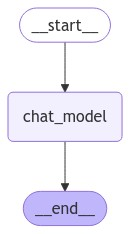

In [23]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


def chat_models(state: MessagesState):
    return {"messages" : [llm.invoke(state["messages"][-1:])] }

builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_models)

builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages.append(out_put["messages"][-1])
messages.append(HumanMessage(content="tell me more about wolf? & which countries Wolf have an national Animal or liked this Animal most?"))

out_put = graph.invoke({"messages": messages})

for m in out_put["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: Hijabie

Hello
================================== Ai Message ==================================
Name: AI

Hi there!
================================ Human Message =================================
Name: HIjabie

How are you?
================================== Ai Message ==================================
Name: AI

I'm doing well, thanks!
================================ Human Message =================================
Name: HIjabie

I want to Know about Wolf?
================================== Ai Message ==================================

Wolves are fascinating and complex animals that belong to the family Canidae. Here are some key points about them:

1. **Species**: The most well-known species is the gray wolf (Canis lupus), but there are several other species, including the red wolf (Canis rufus) and the Arctic wolf (Canis lupus arctos).

2. **Habitat**: Wolves are found in a variety of habitats, 

In [1]:
from langchain_core.messages import trim_messages
from IPython.display import Image, display


def chat_models(state: MessagesState):
    messages = trim_messages(
        state["messages"],
        max_tokens=1000,
        strategy="last",
        token_counter=llm,
        allow_partial=False
    )
    return {"messages" : [llm.invoke(messages)] }

builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_models)

builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

NameError: name 'MessagesState' is not defined

In [30]:
messages.append(out_put["messages"][-1])
messages.append(HumanMessage(content="you forget about Turkish people, Why Turkish People love like & take motivation from wolf?"))

out_put = graph.invoke({"messages": messages})

for m in out_put["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: Hijabie

Hello
================================== Ai Message ==================================
Name: AI

Hi there!
================================ Human Message =================================
Name: HIjabie

How are you?
================================== Ai Message ==================================
Name: AI

I'm doing well, thanks!
================================ Human Message =================================
Name: HIjabie

I want to Know about Wolf?
================================== Ai Message ==================================

Wolves are fascinating and complex animals that belong to the family Canidae. Here are some key points about them:

1. **Species**: The most well-known species is the gray wolf (Canis lupus), but there are several other species, including the red wolf (Canis rufus) and the Arctic wolf (Canis lupus arctos).

2. **Habitat**: Wolves are found in a variety of habitats, 